# <div align="center"> Oskar Borkowski <div align="center"> Lab 9 - naiwny klasyfikator bayerowski

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data.csv', sep=',')
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
textual = [var for var in df.columns if df[var].dtype=='O']
print('Textual data contains :\n{}\n'.format(textual))
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Numerical data contains :\n{}'.format(numerical))

Textual data contains :
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

Numerical data contains :
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [4]:
df[textual].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [5]:
df[numerical].isnull().sum() 

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [6]:
X = df.drop(['income'], axis = 1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [7]:
X = df.drop(['income'], axis=1)

y = df['income']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [8]:
encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd

[' <=50K' ' <=50K' ' <=50K' ... ' >50K' ' <=50K' ' <=50K']
Model accuracy: 0.7974

Confusion matrix
 [[7041  366]
 [1613  749]]
True Positives(TP) =  7041
True Negatives(TN) =  749
False Positives(FP) =  366
False Negatives(FN) =  1613


<AxesSubplot: >

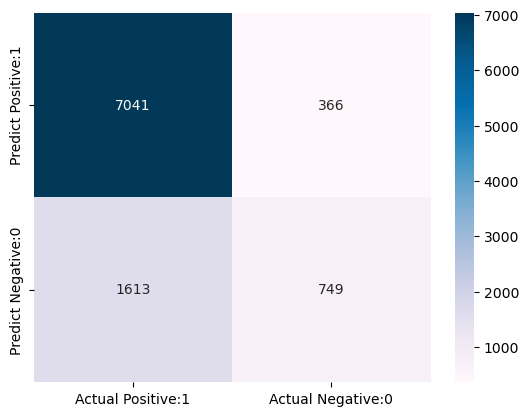

In [9]:
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)

# model accuracy
print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBu')

/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd

Model accuracy: 0.8479

Confusion matrix
 [[   0    1    0    0   79]
 [   0    2    1    0  315]
 [   0    4   62    0  845]
 [   0    0    1    0   71]
 [   0   44  125    0 8219]]


<AxesSubplot: >

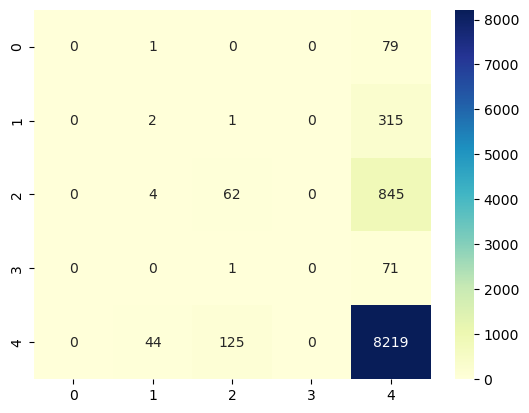

In [10]:
X = df.drop(['race'], axis=1)
y = df['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'income', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/loren/miniconda3/envs/aibd

Model accuracy: 0.0564

Confusion matrix
 [[   0    0    0 ...   11    0   26]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    1    0    4]
 ...
 [   0    0    0 ...  541    0 1188]
 [   0    0    0 ...    2    0    0]
 [   0    0    0 ...    1    0    1]]


<AxesSubplot: >

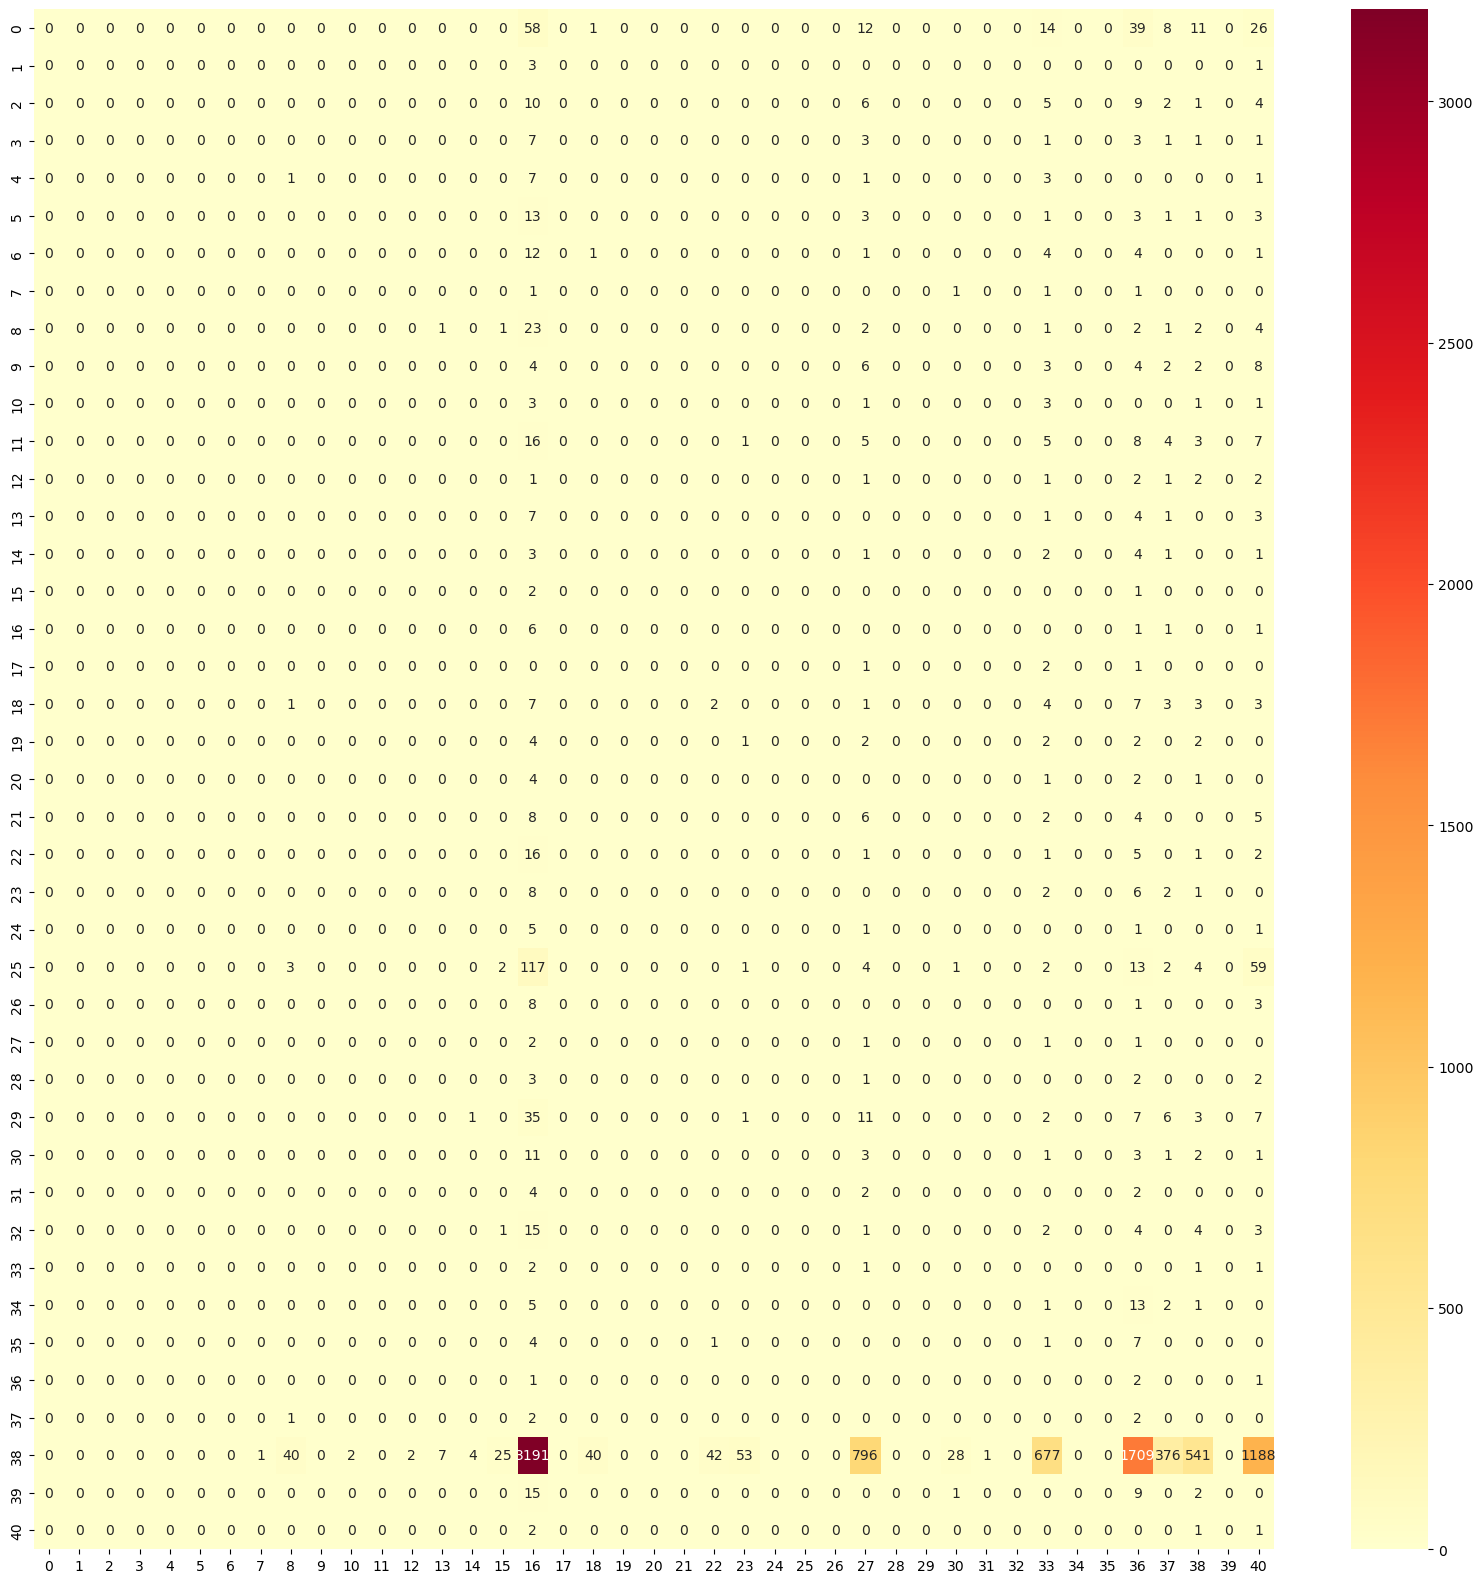

In [11]:
X = df.drop(['native_country'], axis=1)
y = df['native_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'income', 'race', 'sex'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix\n', cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True,  fmt='d', cmap='YlOrRd')